In [1]:
print('Welcome to python')

Welcome to python


📂 Step 1: Load & Clean the Data
  - Import required libraries
  - Load the dataset (VideoGamesSales.csv)
  - Handle duplicates and missing values
  - Clean and rename columns for clarity

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

df=pd.read_csv('E:/Projects/First Project 1234 Python/VideoGamesSales.csv')
# df=df[df.duplicated()]
df=df.drop_duplicates()
df['Region']=df['Region'].fillna('North')
df['NA_Sales']=df['NA_Sales'].replace('[$]','', regex=True)
df['NA_Sales'] = pd.to_numeric(df['NA_Sales'],errors='coerce')
Average_Sales=df['NA_Sales'].mean()

df['Country']=df['Country'].replace({'USA':'United States'})
df['Country']=df['Country'].str.title()
df=df.rename(columns={'NA_Sales':'National Sales','Global_Sales':'Global Sales','NA_Profit':'National Profit','Global_Profit':'Global Profit'})
sales_cap =df['National Sales'].quantile(0.95)
int(sales_cap)
df

📊 Step 2: Data Exploration & Visualization
We will group data by Region and Country to analyze sales patterns and visualize them using bar plots.

In [14]:
# create a bar chart
National_Sales=df.groupby(['Region','Country'])['National Sales'].sum().reset_index().sort_values(by='National Sales', ascending=False)
National_Sales

,Region,Country,National Sales
9,West,United States,1020.79
2,East,United States,812.50
0,Central,United States,701.44
8,West,Australia,683.62
7,South,United States,507.48
4,North,United States,49.35
5,Other,Australia,28.21
6,South,Australia,16.30
3,North,Australia,15.24
1,East,Australia,1.35


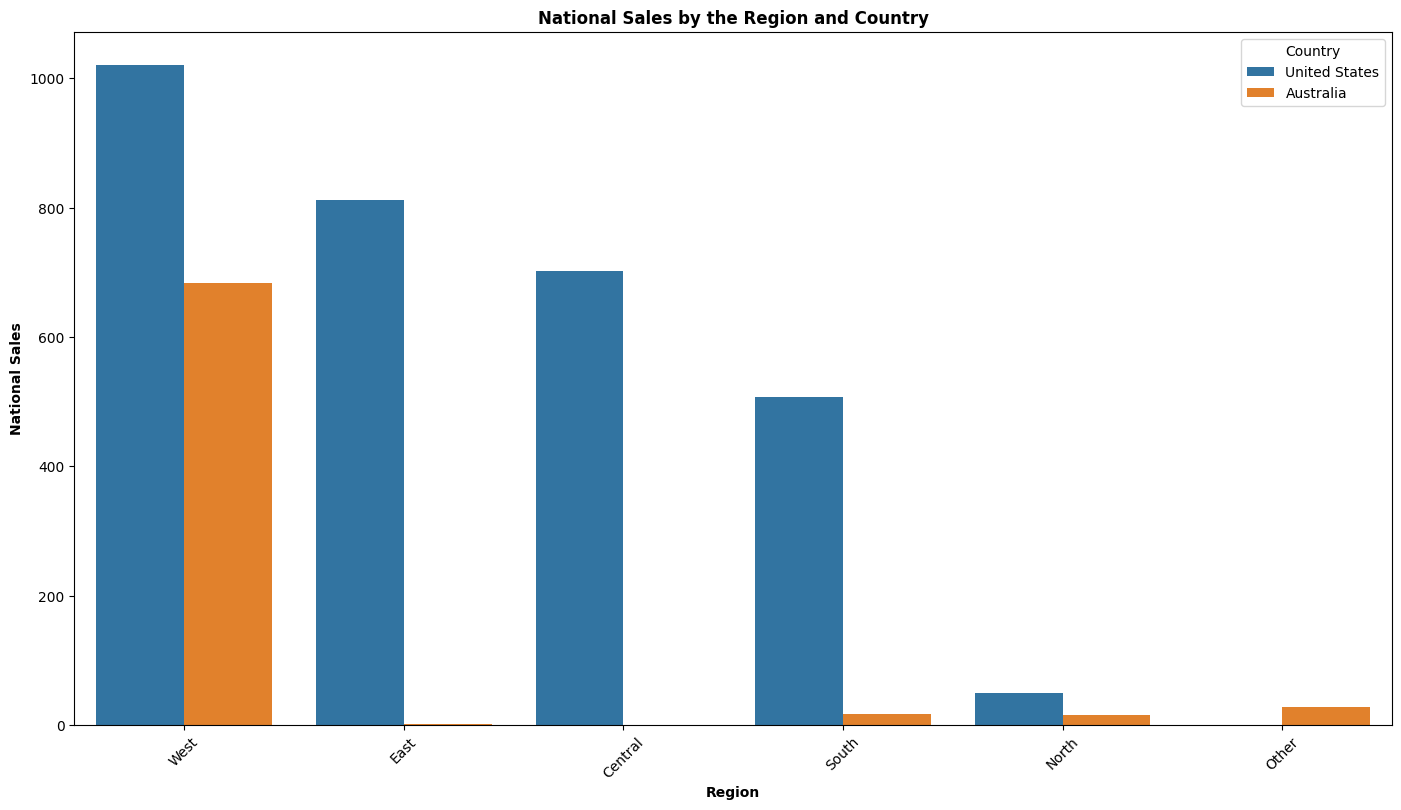

In [12]:
National_Sales=df.groupby(['Region','Country'])['National Sales'].sum().reset_index().sort_values(by='National Sales', ascending=False)
National_Sales
plt.figure(figsize=(17, 9))
sns.barplot(data=National_Sales, x='Region', y='National Sales', hue='Country')
plt.title('National Sales by the Region and Country',fontweight='bold')
plt.xlabel('Region',fontweight='bold')
plt.ylabel('National Sales',fontweight='bold')
plt.xticks(rotation=45)
plt.show()

📦 Step 3: Genre Analysis by Country
Here we compare average national sales by country and genre using bar charts.

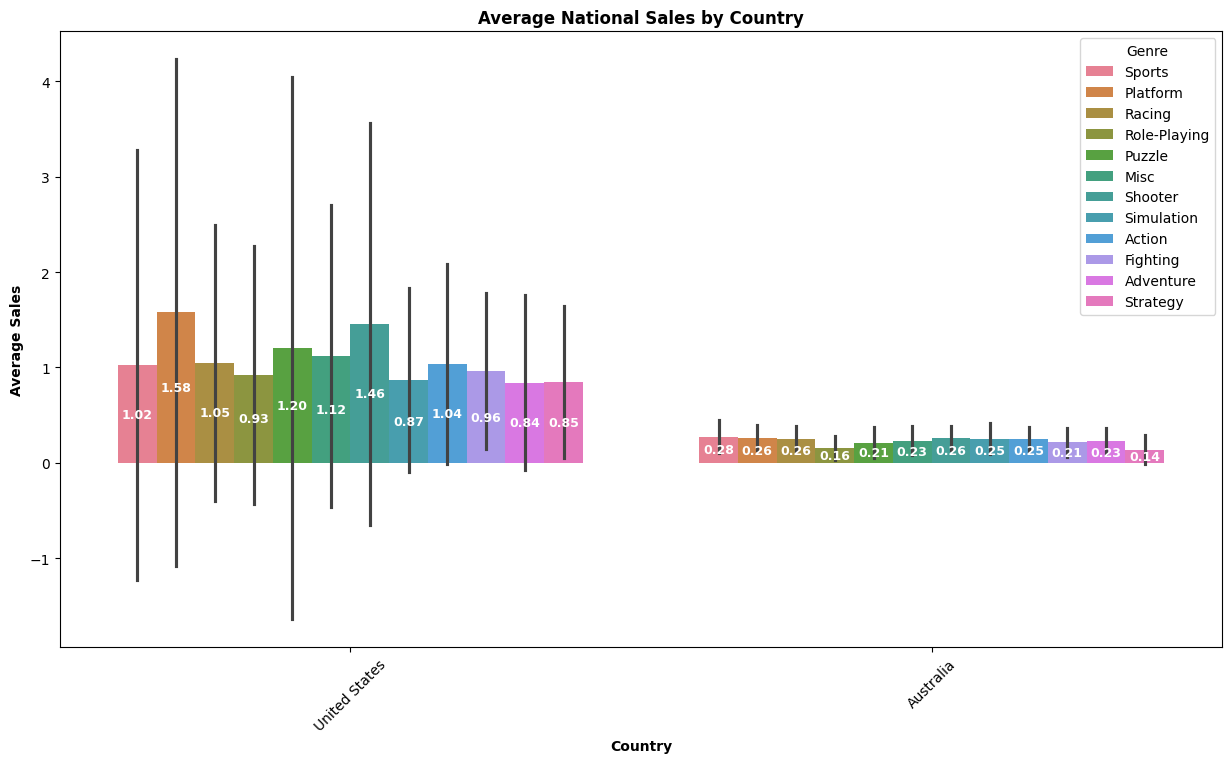

In [10]:
# Create Bar Plot by Genre
plt.figure(figsize=(15, 8))
ax=sns.barplot(x='Country', y='National Sales', data=df, hue='Genre', errorbar='sd')
for container in ax.containers:
    ax.bar_label(container, fmt='%.2f', label_type='center', color='white', fontsize=9, fontweight='bold')

plt.title('Average National Sales by Country', fontweight='bold')
plt.xlabel('Country', fontweight='bold')
plt.ylabel('Average Sales', fontweight='bold')
plt.xticks(rotation=45)
plt.show()

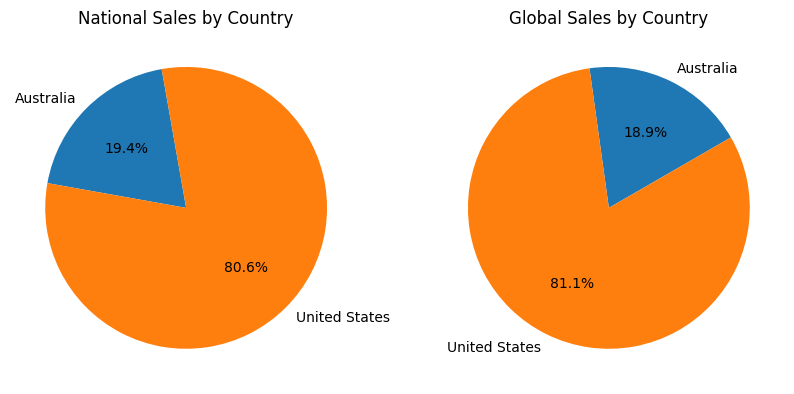

In [48]:
#CREATE A PIE CHART
sales=df.groupby(['Country'])[['National Sales', 'Global Sales']].sum().reset_index()
Country=sales['Country']
National_Sales=sales['National Sales']
Global_Sales= sales['Global Sales']

fig, axs= plt.subplots(1,2, figsize=(10,7))

axs[0].pie(National_Sales, labels=Country, autopct='%1.1f%%', startangle=100)
axs[0].set_title('National Sales by Country')

axs[1].pie(Global_Sales, labels=Country, autopct='%1.1f%%', startangle=30)
axs[1].set_title('Global Sales by Country')

plt.show()

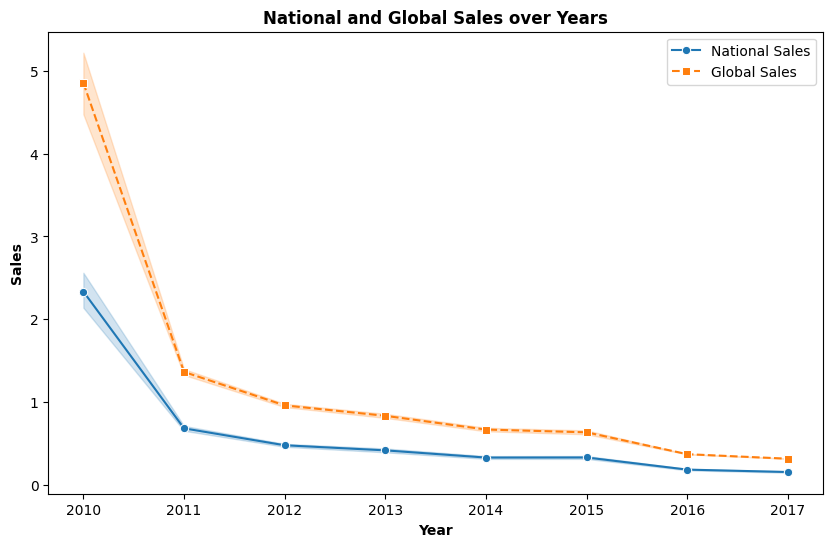

In [6]:
#create line chart
plt.figure(figsize=(10,6))
# Line for National Sales
sns.lineplot(x='Year', y='National Sales', data=df, marker='o', label='National Sales')

# Line for Global Sales
sns.lineplot(x='Year', y='Global Sales', data=df, marker='s', linestyle='--', label='Global Sales')

# Adding titles and labels
plt.title('National and Global Sales over Years', fontweight='bold')
plt.xlabel('Year', fontweight='bold')
plt.ylabel('Sales', fontweight='bold')
plt.legend()
plt.show()